# **Predicting House Prices Using the Boston Housing Dataset**

The primary objective of this task is to predict house prices using the Boston Housing Dataset by building and evaluating regression models. The task involves implementing Linear Regression, Random Forest, and XGBoost models from scratch and comparing their performance.

## **Dataset Overview**
The Boston Housing Dataset contains information collected by the U.S Census Service concerning housing in the Boston area. It includes the following features:

* **CRIM:** Per capita crime rate by town.
* **ZN:** Proportion of residential land zoned for lots over 25,000 sq. ft.
* **INDUS:** Proportion of non-retail business acres per town.
* **CHAS:** Charles River dummy variable (1 if tract bounds river; 0 otherwise).
* **NOX:** Nitric oxide concentration (parts per 10 million).
* **RM:** Average number of rooms per dwelling.
* **AGE:** Proportion of owner-occupied units built before 1940.
* **DIS:** Weighted distances to five Boston employment centers.
* **RAD:** Index of accessibility to radial highways.
* **TAX:** Full-value property tax rate per 10,000.
* **PTRATIO:** Pupil-teacher ratio by town.
* **LSTAT:** Percentage of lower-status residents.
* **PRICE:** Median value of owner-occupied homes (in $1000s) — Target Variable.



### **Step 1: Data Preprocessing**

**Verify Dataset Loading**

In [4]:
# Step 1: Data Preprocessing

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "PRICE"
]
df = pd.read_csv('BostonHousing.csv', header=None, names=columns)

# Check the dataset for any non-numeric values
print("Dataset Preview:")
print(df.head())
print(df.info())  # Ensure all columns are numeric


Dataset Preview:
      CRIM  ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0     crim  zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio   
1  0.00632  18   2.31     0  0.538  6.575  65.2    4.09    1  296     15.3   
2  0.02731   0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3  0.02729   0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
4  0.03237   0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   

        B  LSTAT PRICE  
0       b  lstat  medv  
1   396.9   4.98    24  
2   396.9   9.14  21.6  
3  392.83   4.03  34.7  
4  394.63   2.94  33.4  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CRIM     507 non-null    object
 1   ZN       507 non-null    object
 2   INDUS    507 non-null    object
 3   CHAS     507 non-null    object
 4   NOX      507 non-null    object


**Exclude Non-Numeric Rows**

In [5]:
# Ensure all columns except the target are numeric
X = df.drop(columns=['PRICE']).apply(pd.to_numeric, errors='coerce')
y = df['PRICE']

# Check for NaN values after coercion
print("Checking for NaN values in features:")
print(X.isnull().sum())


Checking for NaN values in features:
CRIM       1
ZN         1
INDUS      1
CHAS       1
NOX        1
RM         1
AGE        1
DIS        1
RAD        1
TAX        1
PTRATIO    1
B          1
LSTAT      1
dtype: int64


In [6]:
# Drop rows with NaN values (optional: handle missing values instead of dropping)
X = X.dropna()
y = y.loc[X.index]  # Keep the target aligned with the features


**Retry Scaling**

In [7]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print dataset shapes to verify
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set shape: X_train: (404, 13), y_train: (404,)
Testing set shape: X_test: (102, 13), y_test: (102,)


### **Visualization**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

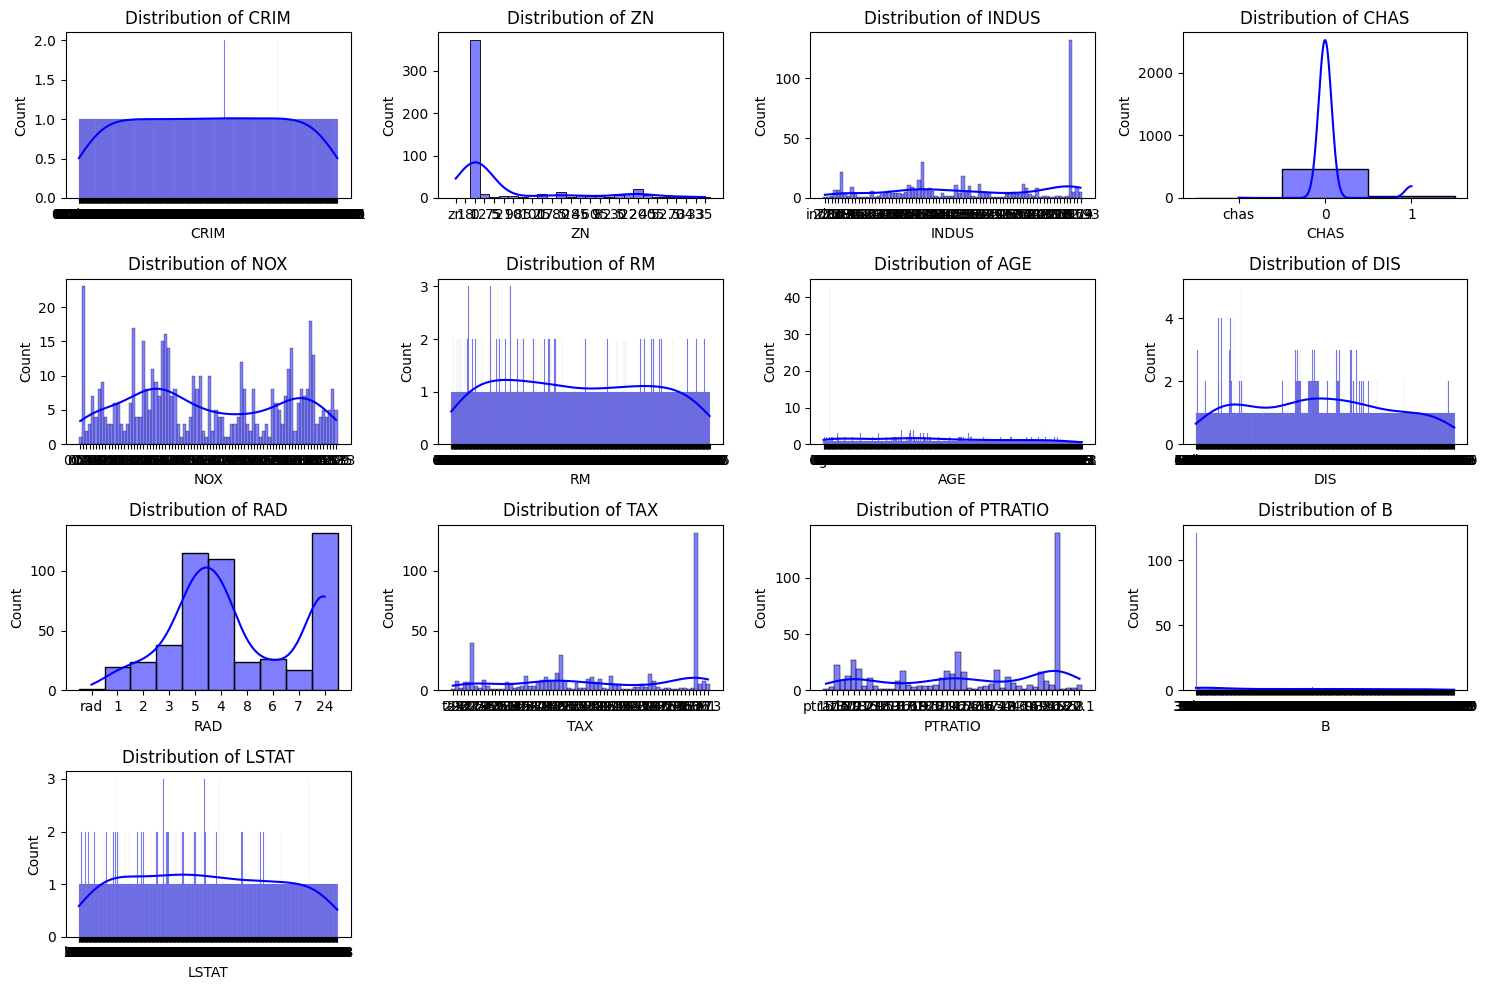

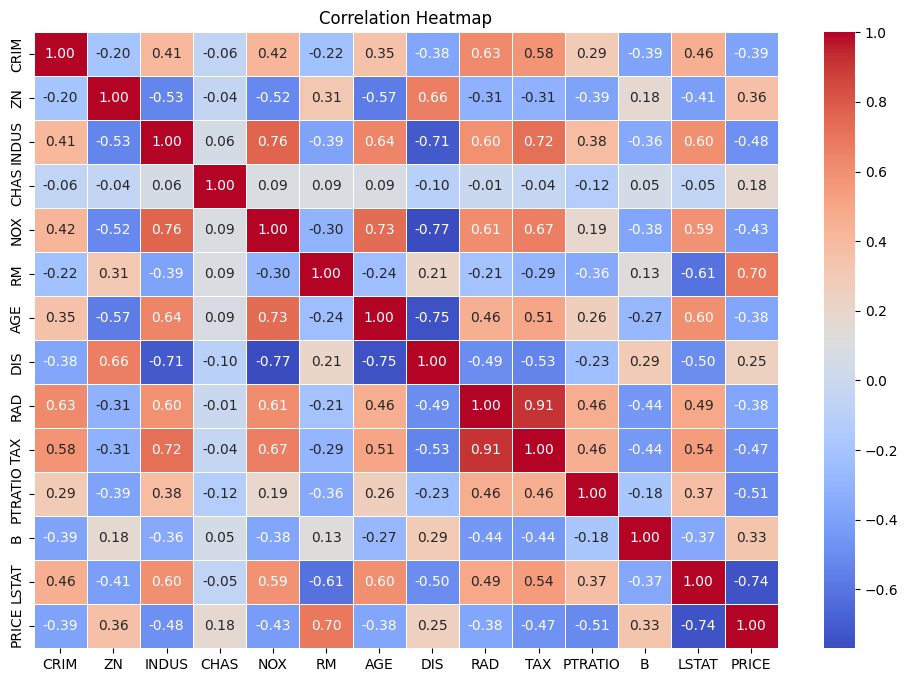

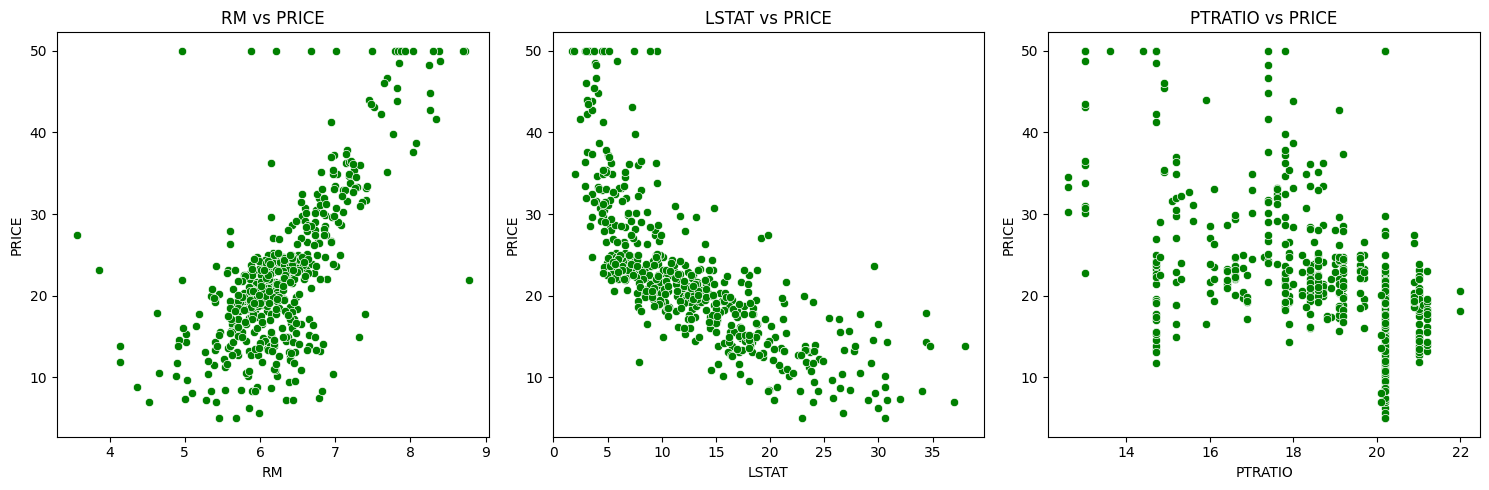

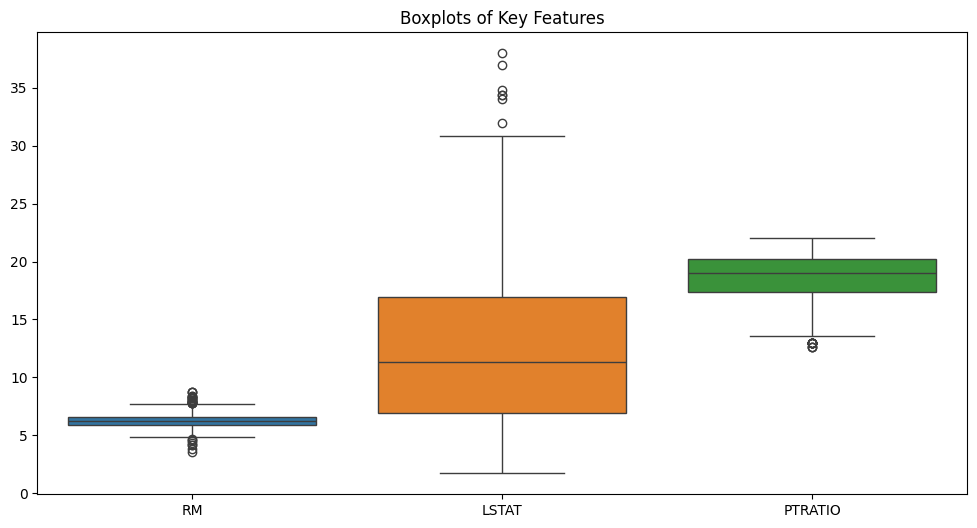

In [13]:
# 1. Feature Distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):  # Exclude the target column
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=20, color="blue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Convert all columns to numeric, coercing errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values if necessary
df = df.dropna()

# Compute the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# 3. Scatterplots for Key Features vs. PRICE
key_features = ["RM", "LSTAT", "PTRATIO"]  # Select features for scatterplots
plt.figure(figsize=(15, 5))
for i, feature in enumerate(key_features):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=df[feature], y=df["PRICE"], color="green")
    plt.title(f"{feature} vs PRICE")
    plt.xlabel(feature)
    plt.ylabel("PRICE")
plt.tight_layout()
plt.show()

# 4. Boxplots for Key Features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[key_features])
plt.title("Boxplots of Key Features")
plt.xticks(range(len(key_features)), key_features)
plt.show()